## <center>IMDB MOVIES EXPLORATION</center>

### SETTING UP AND IMPORTING THE DATA

In [1]:
import kaggle

In [2]:
!kaggle datasets download -d rajugc/imdb-movies-dataset-based-on-genre

 99%|█████████████████████████████████████▋| 53.0M/53.4M [00:04<00:00, 14.3MB/s]
100%|██████████████████████████████████████| 53.4M/53.4M [00:04<00:00, 12.8MB/s]


In [3]:
!unzip imdb-movies-dataset-based-on-genre.zip -d data/

Archive:  imdb-movies-dataset-based-on-genre.zip
  inflating: data/action.csv         
  inflating: data/adventure.csv      
  inflating: data/animation.csv      
  inflating: data/biography.csv      
  inflating: data/crime.csv          
  inflating: data/family.csv         
  inflating: data/fantasy.csv        
  inflating: data/film-noir.csv      
  inflating: data/history.csv        
  inflating: data/horror.csv         
  inflating: data/mystery.csv        
  inflating: data/romance.csv        
  inflating: data/scifi.csv          
  inflating: data/sports.csv         
  inflating: data/thriller.csv       
  inflating: data/war.csv            


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import scipy

In [77]:
#plt.style.use('ggplot')
#pd.set_option('display.max_rows', 200)

### DATA UNDERSTANDING

In [3]:
df1 = pd.read_csv('data/action.csv')

In [4]:
df1.shape

(52452, 14)

In [5]:
df1.head(5)

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN


In [6]:
df1.columns

Index(['movie_id', 'movie_name', 'year', 'certificate', 'runtime', 'genre',
       'rating', 'description', 'director', 'director_id', 'star', 'star_id',
       'votes', 'gross(in $)'],
      dtype='object')

In [7]:
df1.dtypes

movie_id        object
movie_name      object
year            object
certificate     object
runtime         object
genre           object
rating         float64
description     object
director        object
director_id     object
star            object
star_id         object
votes          float64
gross(in $)    float64
dtype: object

In [8]:
df1.describe()

,rating,votes,gross(in $)
count,29448.000000,2.945000e+04,2.760000e+03
mean,5.697755,1.159384e+04,4.166888e+07
std,1.359132,7.039375e+04,8.033689e+07
min,1.100000,5.000000e+00,7.000000e+00
25%,4.800000,2.925000e+01,5.459445e+05
50%,5.800000,1.320000e+02,1.090365e+07
75%,6.600000,9.440000e+02,4.631759e+07
max,10.000000,2.675531e+06,9.366622e+08


In [33]:
#Checking to see the columns in all files
directory_path = 'data/'
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

all_columns = set()

for file in csv_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    columns = set(df.columns)
    all_columns.update(columns)

print("Column Names across all files:")
print(all_columns)

Column Names across all files:
{'rating', 'description', 'director_id', 'votes', 'certificate', 'star_id', 'movie_id', 'gross(in $)', 'movie_name', 'director', 'runtime', 'star', 'genre', 'year'}


In [28]:
#Counting the number of rows in all files
directory_path = 'data/'

csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

shape_info = []

for file in csv_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    rows, columns = df.shape
    shape_info.append({'File': file, 'Rows': rows, 'Columns': columns})

shape_info_df = pd.DataFrame(shape_info)

shape_info_df

,File,Rows,Columns
0,crime.csv,35852,14
1,horror.csv,36682,14
2,history.csv,8996,14
3,romance.csv,52617,14
4,film-noir.csv,986,14
5,family.csv,17095,14
6,animation.csv,8419,14
7,mystery.csv,18960,14
8,sports.csv,5292,14
9,adventure.csv,25664,14


In [30]:
total_rows = shape_info_df['Rows'].sum()

print(f'Total Number of Rows: {total_rows}')

Total Number of Rows: 368300


### DATA PREPARATION

Merging all Genres to create a single master file for further analysis

In [31]:
directory_path = 'data/'
                                                                                                     # Listing all CSV files in directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
                                                                                    # A empty list to store DataFrames from each CSV file
dfs = []

for file in csv_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)
                                                                                                    # Concatenate all DataFrames into one
dx = pd.concat(dfs, ignore_index=True)
                                                                                         # Saving the concatenated data to a new CSV file
dx.to_csv('data/Merged_Movies/dx.csv', index=False)

print(dx.head(5))

     movie_id         movie_name  year certificate  runtime  \
0   tt5433140             Fast X  2023         NaN      NaN   
1  tt11564570        Glass Onion  2022       PG-13  139 min   
2  tt10365998      Infinity Pool  2023           R  117 min   
3  tt14138650  The Pale Blue Eye  2022           R  128 min   
4  tt15789492           Infiesto  2023       TV-MA   96 min   

                    genre  rating  \
0  Action, Crime, Mystery     NaN   
1    Comedy, Crime, Drama     7.2   
2  Crime, Horror, Mystery     6.5   
3  Crime, Horror, Mystery     6.6   
4  Crime, Drama, Thriller     5.5   

                                         description            director  \
0  Dom Toretto and his family are targeted by the...     Louis Leterrier   
1  Famed Southern detective Benoit Blanc travels ...        Rian Johnson   
2  James and Em Foster are enjoying an all-inclus...  Brandon Cronenberg   
3  A world-weary detective is hired to investigat...        Scott Cooper   
4  Two detectives 

In [32]:
dx.shape #Resulting number of rows is the same as the sum of rows in all individual csv files

(368300, 14)

In [35]:
dx.columns #They're the same as in any individual csv file

Index(['movie_id', 'movie_name', 'year', 'certificate', 'runtime', 'genre',
       'rating', 'description', 'director', 'director_id', 'star', 'star_id',
       'votes', 'gross(in $)'],
      dtype='object')

In [38]:
dx.isna().sum()

movie_name          4
year            66060
certificate    264109
runtime        109154
genre               0
rating         137362
description         0
director        27369
star            58695
votes          137358
gross(in $)    343261
dtype: int64

In [42]:
#Dropping irrelevant columns

dx = dx[[#'movie_id', 
    'movie_name', 'year', 
    #'certificate'- high number of missing values 
    'runtime', 'genre', 'rating', 
    'description', 'director', 
    #'director_id', 
    'star', 
    #'star_id',
    #'votes', 
    #'gross(in $)'- high number of missing values
    ]].copy()

Changing Data Types

In [37]:
dx['year'] = pd.to_numeric(dx['year'], errors='coerce').astype('Int64')

In [111]:
dx['Runtime'] = dx['Runtime'].astype(str).str.extract(r'(\d+)', expand=False)

dx['Runtime'] = pd.to_numeric(dx['Runtime'], errors='coerce').astype('Int64')

In [107]:
dx['Rating'] = dx['Rating'].astype(str).str.extract('(\\d+)', expand=False)

dx['Rating'] = pd.to_numeric(dx['Rating'], errors='coerce')

Getting rid of duplicated rows

In [46]:
dx = dx.loc[~dx.duplicated()] \
    .reset_index(drop=True).copy()

In [47]:
dx.shape 

(245360, 8)

We see 122940 duplicate rows were deleted

Removing the \n value from the stars column and separating the cast into separate columns

In [61]:
dx[['Actor_1', 'Actor_2', 'Actor_3', 'Actor_4']] = dx['star'].str.split(', \n', expand=True) 

Separating the genres into separate columns

In [64]:
dx[['Genre_1', 'Genre_2', 'Genre_3']] = dx['genre'].str.split(', ', expand=True)

Renaming and Rearranging the columns

In [68]:
dx = dx[['movie_name', 'year', 'runtime', 
         #'genre',
         'Genre_1', 'Genre_2', 'Genre_3',
         'rating', 'description',
       'director', #'star', 
         'Actor_1', 'Actor_2', 'Actor_3', 'Actor_4'
       ]].copy()

In [112]:
dx = dx.rename(columns={'movie_name': 'Movie'
                        , 'year':'Year'
                        , 'runtime':'Runtime (min)'
                        , 'rating':'Rating' 
                        , 'description':'Description'
                        , 'director':'Director'})

In [124]:
dx.head(5)

,Movie,Year,Runtime (min),Genre_1,Genre_2,Genre_3,Rating,Description,Director,Actor_1,Actor_2,Actor_3,Actor_4
0,Fast X,2023,<NA>,Action,Crime,Mystery,NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,Vin Diesel,Jordana Brewster,Tyrese Gibson,Michelle Rodriguez
1,Glass Onion,2022,139,Comedy,Crime,Drama,7.0,Famed Southern detective Benoit Blanc travels ...,Rian Johnson,Daniel Craig,Edward Norton,Kate Hudson,Dave Bautista
2,Infinity Pool,2023,117,Crime,Horror,Mystery,6.0,James and Em Foster are enjoying an all-inclus...,Brandon Cronenberg,Alexander Skarsgård,Mia Goth,Cleopatra Coleman,Dunja Sepcic
3,The Pale Blue Eye,2022,128,Crime,Horror,Mystery,6.0,A world-weary detective is hired to investigat...,Scott Cooper,Christian Bale,Harry Melling,Simon McBurney,Timothy Spall
4,Infiesto,2023,96,Crime,Drama,Thriller,5.0,Two detectives are called to a small mining to...,Patxi Amezcua,Isak Férriz,Iria del Río,Antonio Buíl,Juan Fernández


We are now satisfied with the final table with data types transformed, duplicated rows dropped, and columns segregated

### FEATURE UNDERSTANDING

Text(0, 0.5, 'Count')

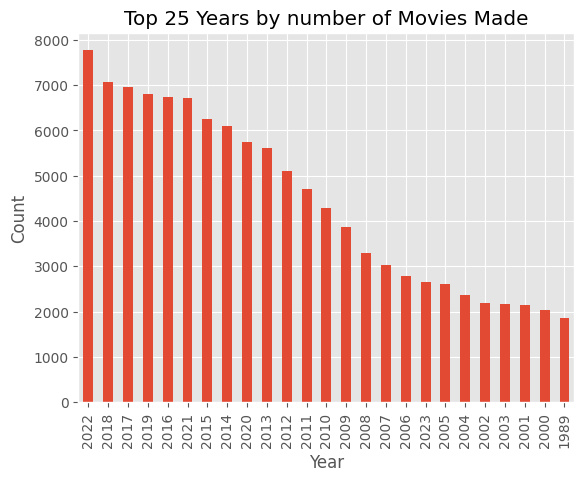

In [95]:
ax = dx['Year'].value_counts() \
    .head(25) \
    .plot(kind='bar', title='Top 25 Years by number of Movies Made')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

The number of movies made per year is significantly increasing over time

Text(0, 0.5, 'Count')

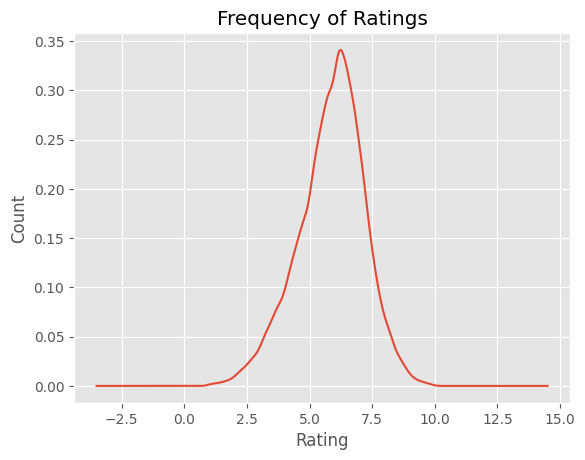

In [103]:
ax = dx['Rating'].plot(kind='kde', title='Frequency of Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

Majority of movies have an average rating of around 6.0 out of 10

### FEATURE RELATIONSHIP

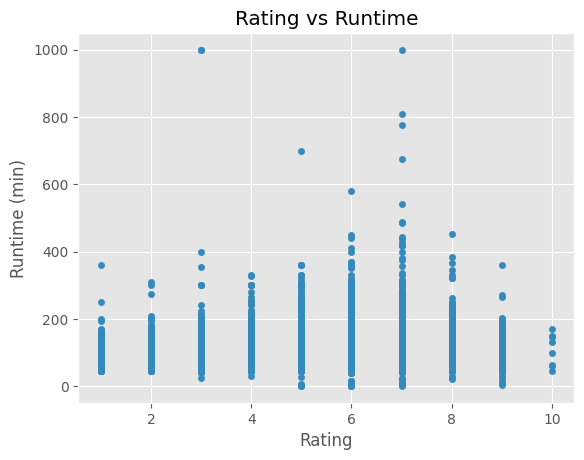

In [117]:
dx.plot(kind='scatter',
        x='Rating',
        y='Runtime (min)',
        title='Rating vs Runtime')
plt.show()

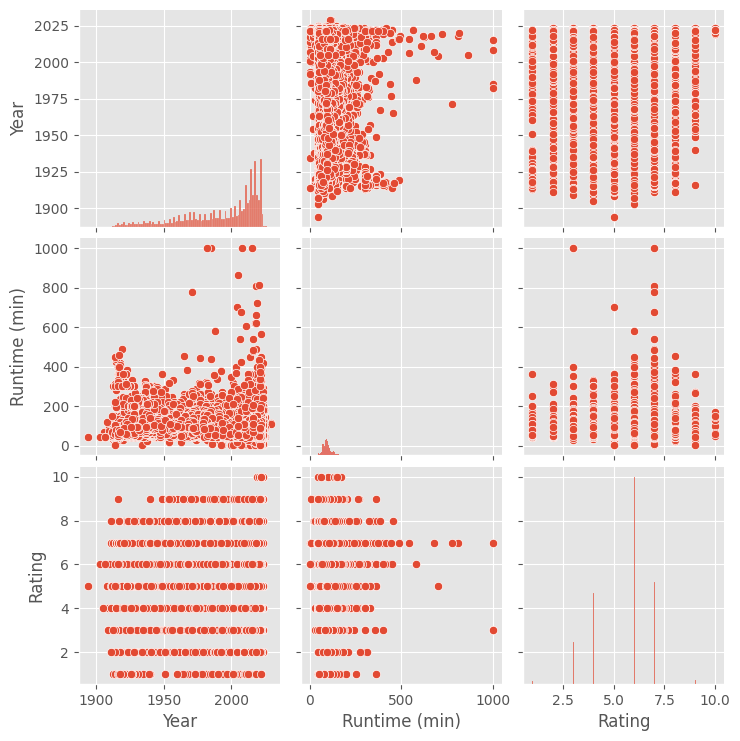

In [120]:
sns.pairplot(dx,
             vars=['Year','Runtime (min)',
                   'Rating'])
plt.show()

In [122]:
dx_corr = dx[['Year','Runtime (min)',
                   'Rating']].dropna().corr()
dx_corr

,Year,Runtime (min),Rating
Year,1.000000,0.141848,-0.118020
Runtime (min),0.141848,1.000000,0.160659
Rating,-0.118020,0.160659,1.000000


<Axes: >

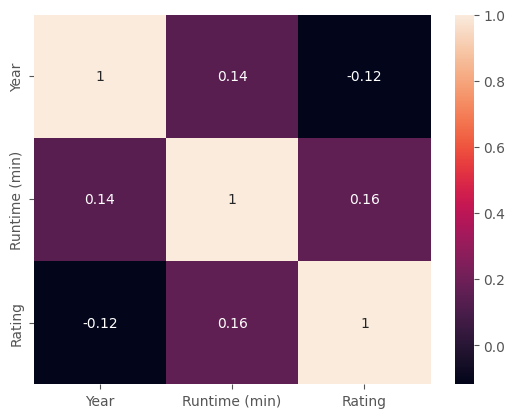

In [123]:
sns.heatmap(dx_corr, annot=True)